In [2]:
import utils
import operator
import itertools
import pandas
# topics: http://www.newsreader-project.eu/files/2013/01/NWR-2014-1.pdf

In [3]:
topics = {
    'crime' : ['escape', 'shoot', 'kill', 'assassination', 'rob', 'vandalism', 'attack', 'riot', 'steal', 'bomb'],
    'life': ['die'],
    'employment': ['hire', 'fire'],
    'business': ['profit', 'takeover', 'merge', 'release', 'sales'],
    'disasters' : ['earthquake', 'fire', 'flood', 'storm', 'explosion']
}

## Number of SignalMedia news articles per (topic + topical expressions)

In [4]:
topic='employment'
topic='business'
topic='crime'
topic='life'
topic='disasters'
lex_exps=topics[topic]
print(lex_exps)
combs = []
cnt=0
id_to_query={}
for i in range(1, len(lex_exps)+1):
    els = [list(x) for x in itertools.combinations(lex_exps, i)]
    for combo in els:
        q = topic + ' ' + ' '.join(list(combo))
        combs.append([i, q, utils.count_for_query(q)])
        id_to_query[str(cnt)]=q
        cnt+=1
        
headers = ['number_of_terms',  'terms', 'number_of_articles']
df = pandas.DataFrame(combs, columns=headers)
df

#table = utils.show_me(df, keys, headers, meta={'number_of_articles'})
#display(HTML(table))

['earthquake', 'fire', 'flood', 'storm', 'explosion']


,number_of_terms,terms,number_of_articles
0,1,disasters earthquake,301
1,1,disasters fire,362
2,1,disasters flood,195
3,1,disasters storm,243
4,1,disasters explosion,83
5,2,disasters earthquake fire,65
6,2,disasters earthquake flood,38
7,2,disasters earthquake storm,38
8,2,disasters earthquake explosion,23
9,2,disasters fire flood,44


## Analyze a specific query ID

In [7]:
#q="disasters earthquake fire"
query_id=10
q=id_to_query[str(query_id)]
url=utils.create_url_from_query(q, 1000)
#print(url)
all_results = utils.extract_hits(url)
#print(all_results)

## Inspect time

In [8]:
dates_freq = utils.count_times(all_results)
utils.print_first_x(dates_freq)

2015 42
2012 8
2013 4
2014 1


## Inspect article lengths

In [9]:
length_freq = utils.count_lenght(all_results)
utils.print_first_x(length_freq)

500 15
1000 4
1400 4
1600 3
2700 3
900 3
800 3
1500 3
1900 2
400 2
600 2


## Inspect sources

In [10]:
sources_freq = utils.count_sources(all_results)
utils.print_first_x(sources_freq)

Rolling Stone 3
climate-weather 2
Contra Costa Times 2
news-yahoo 2
reuters 2
Telegraph 2
Grand Rapids Herald-Review 1
jrep 1
Examiner.com 1
Hsu Oracle 1
Baltimore Sun 1


## One example

In [11]:
for value in all_results.values():
    print(value)
    break

{'_id': 'AVZ496b62qyzgx0SP79N', '_score': 0.90412647, '_source': {'media-type': 'News', 'id': '44220275-857b-46eb-a2a4-c38d7a767b88', 'published': '2015-09-24T11:44:28Z', 'content': '(NAPSI)—Year after year, millions of Americans face danger from major storms, natural disasters and threatening power outages. The increasingly unpredictable nature of weather patterns, along with threats to our infrastructure provide a warning that major headaches can occur if homeowners postpone taking the steps necessary for proper preparedness. \n  \n“Proper preparedness is the best way to avoid potential harm to your home and your family,” said home improvement expert and Generac partner Danny Lipford, “Since September is National Preparedness Month, it’s an especially good time to create a disaster preparedness kit. I like to store mine in a laundry basket, so all of my items are organized in one place.” \n \nA disaster preparedness kit should contain the following items: \n \n• Fresh water and nonpe

In [12]:
print(all_results)

{'44220275-857b-46eb-a2a4-c38d7a767b88': {'_id': 'AVZ496b62qyzgx0SP79N', '_score': 0.90412647, '_source': {'media-type': 'News', 'id': '44220275-857b-46eb-a2a4-c38d7a767b88', 'published': '2015-09-24T11:44:28Z', 'content': '(NAPSI)—Year after year, millions of Americans face danger from major storms, natural disasters and threatening power outages. The increasingly unpredictable nature of weather patterns, along with threats to our infrastructure provide a warning that major headaches can occur if homeowners postpone taking the steps necessary for proper preparedness. \n  \n“Proper preparedness is the best way to avoid potential harm to your home and your family,” said home improvement expert and Generac partner Danny Lipford, “Since September is National Preparedness Month, it’s an especially good time to create a disaster preparedness kit. I like to store mine in a laundry basket, so all of my items are organized in one place.” \n \nA disaster preparedness kit should contain the foll

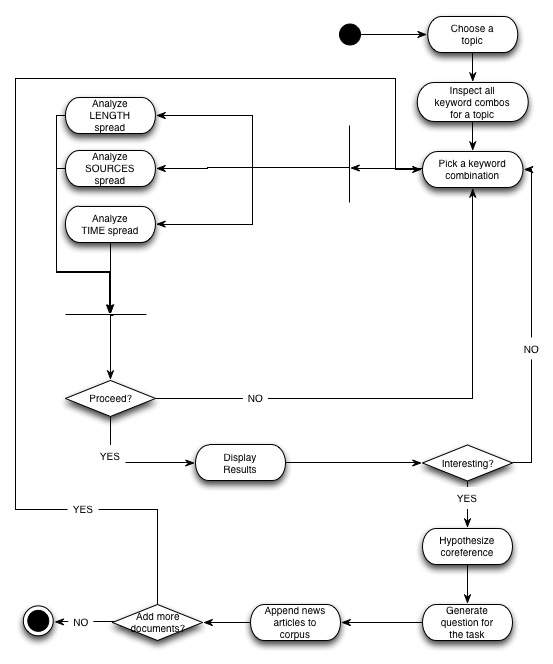

In [6]:
from IPython.display import Image
Image(filename='files/sm_workflow.png')